# Caçador de OVNIs

Em que estado e horário é mais "fácil" de avistar um OVNI nos EUA?

### Importando o que importa

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

### Lendo o arquivo com todas as ocorrências

In [3]:
df = pd.read_json('ovins.json')

In [4]:
type(df)

pandas.core.frame.DataFrame

### Visualizando uma amostra dos dados

In [5]:
df.head(2)

,link,date,city,state,country,shape,duration,summary,posted,images
0,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 17:45:00,Malang,East Java,Indonesia,Light,Still there as at 8:30pm,Green flashing (and moving) lights,7/29/23,None
1,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 11:20:00,Riverview,FL,USA,Unknown,11:21,.001/ 9 screen shot clip of fly by,7/29/23,Yes


### Renomeando as colunas

In [6]:
df.columns = ['link', 'data', 'cidade', 'estado', 'pais', 'forma', 'duracao', 'relato', 'postado', 'imagens']
df.head(2)

,link,data,cidade,estado,pais,forma,duracao,relato,postado,imagens
0,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 17:45:00,Malang,East Java,Indonesia,Light,Still there as at 8:30pm,Green flashing (and moving) lights,7/29/23,None
1,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 11:20:00,Riverview,FL,USA,Unknown,11:21,.001/ 9 screen shot clip of fly by,7/29/23,Yes


In [7]:
df.tail(2)

,link,data,cidade,estado,pais,forma,duracao,relato,postado,imagens
5726,https://www.nuforc.org/webreports/ndxe201707.html,2017-07-04 22:00:00,Franklin Square,NY,USA,Sphere,10 minutes,"Six UFO's in one night, five on video!",7/7/17,None
5727,https://www.nuforc.org/webreports/ndxe201707.html,2017-07-04 22:00:00,Buchanan,MI,USA,Circle,4 minutes,"2 round crafts, least 100yds each in diameter ...",12/14/18,None


In [8]:
df_dropped_forma = df.dropna(subset = ['forma'])

print(df.shape)
print(df_dropped_forma.shape)


(5728, 10)
(5561, 10)


### Convertendo uma coluna com datas de <code>string</code> para <code>datetime</code>

In [9]:
df['data'] = pd.to_datetime(df['data'])

In [10]:
df.head(2)

,link,data,cidade,estado,pais,forma,duracao,relato,postado,imagens
0,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 17:45:00,Malang,East Java,Indonesia,Light,Still there as at 8:30pm,Green flashing (and moving) lights,7/29/23,None
1,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 11:20:00,Riverview,FL,USA,Unknown,11:21,.001/ 9 screen shot clip of fly by,7/29/23,Yes


### Limpando os relatos com dados faltantes

In [11]:
df_dropped = df.dropna(subset = ['forma'])

In [12]:
df_dropped.shape

(5561, 10)

### Agrupando os resultados por estado

In [13]:
ocorrencias_por_estado = df_dropped.groupby('estado')['data'].count()

In [14]:
ocorrencias_por_estado.sort_values(ascending=False, inplace=True)

### Plotando os 10 estados com mais ocorrências

In [15]:
ocorrencias_por_estado.describe()

count     95.000000
mean      56.589474
std       90.825938
min        1.000000
25%        1.000000
50%       24.000000
75%       80.500000
max      655.000000
Name: data, dtype: float64

<Axes: xlabel='estado'>

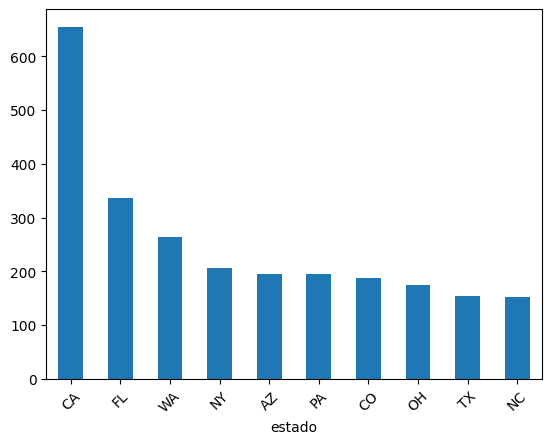

In [16]:
ocorrencias_por_estado.head(10).plot.bar(rot=45)

### Extraindo um <code>subset</code> com somente com os dados da Califórnia

In [17]:
selector = df_dropped['estado'] == "CA"

In [18]:
california = df_dropped[selector]

In [19]:
california.head(2)

,link,data,cidade,estado,pais,forma,duracao,relato,postado,imagens
9,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-27 23:05:00,san francisco,CA,USA,Light,45 seconds,I saw a blue light moving through the foggy ev...,7/29/23,None
15,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-27 13:00:00,Rancho Cucamonga,CA,USA,Oval,7 seconds,"Silent, silver shape moving faster than airplane",7/29/23,None


### Extraindo a hora de cada ocorrência e adicionando em uma nova coluna

In [20]:
california['hora'] = california['data'].dt.hour

### Plotando um <code>histograma</code> para examinar a distribuição de ocorrências

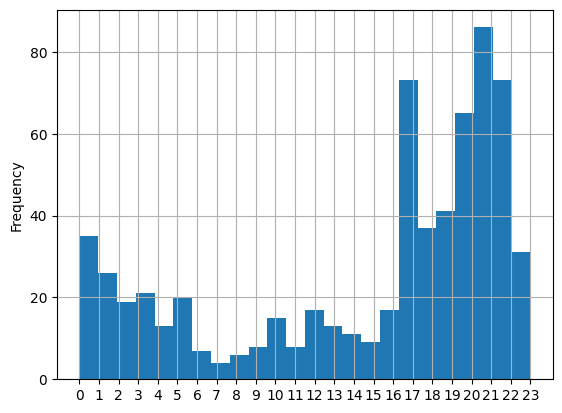

In [21]:
hora_hist = california['hora'].plot.hist(bins=24, grid=True)
plt.xticks(range(california['hora'].min(), california['hora'].max()+1, 1))
plt.show()

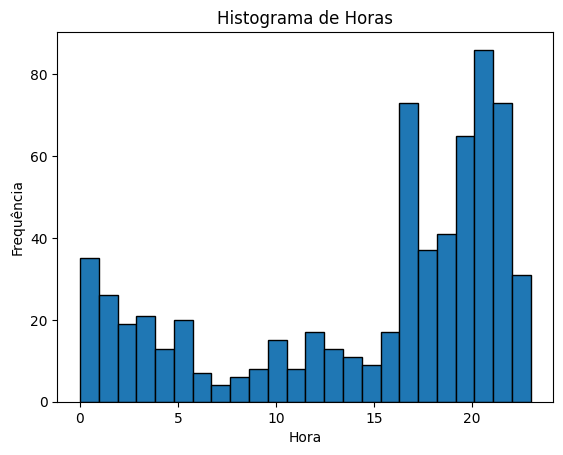

In [22]:
plt.hist(california['hora'], bins=24, edgecolor='black')  # 'bins' define o número de barras
plt.xlabel('Hora')
plt.ylabel('Frequência')
plt.title('Histograma de Horas')
plt.show()

# Desafio

### Quais os 5 formatos de OVNI mais comuns nos relatos?

In [23]:
df_dropped_bla = df_dropped[df_dropped['forma']!= "Unknown"]

In [24]:
df_dropped_final = df_dropped_bla[df_dropped_bla['forma']!="Other"]

In [25]:
# CODE
forma = df_dropped_final.groupby('forma')['forma'].count()
forma.head(2)

forma
Changing    185
Chevron      80
Name: forma, dtype: int64

In [32]:
forma_final = (df_dropped['forma'] != "Unknown") & (df_dropped['forma'] != "Other")

In [39]:
df_dropped[forma_final].value_counts('forma').head()

forma
Light       1072
Circle       639
Triangle     432
Orb          349
Fireball     291
Name: count, dtype: int64

### Qual o horário mais difícil para avistarmos um OVNI em forma de Charuto?

In [50]:
# CODE
df_dropped_charuto = df_dropped[df_dropped['forma'] == "Cigar"]
df_dropped_charuto['hora'] = df_dropped_charuto['data'].dt.hour

In [51]:
df_dropped_charuto.value_counts('hora').sort_values(ascending=True).head()

hora
9     2
1     2
6     3
11    3
0     4
Name: count, dtype: int64

# Wordcloud


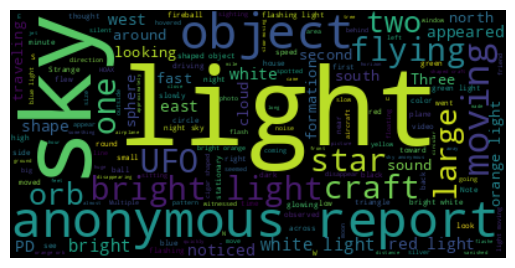

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# dropping nill
relatos = df.relato.dropna()

# combining summary
text = " ".join(review for review in relatos)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["saw", "looked", "nuforc", "seen", "disappeared", "hovering"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.query("forma != None & imagens != None ")

,link,data,cidade,estado,pais,forma,duracao,relato,postado,imagens
0,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 17:45:00,Malang,East Java,Indonesia,Light,Still there as at 8:30pm,Green flashing (and moving) lights,7/29/23,None
1,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 11:20:00,Riverview,FL,USA,Unknown,11:21,.001/ 9 screen shot clip of fly by,7/29/23,Yes
2,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 02:30:00,Mallusk,Antrim and Newtownabbey,United Kingdom,Triangle,still current,A very bright light which moved closer. On the...,7/29/23,Yes
3,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 00:20:00,Worksop,Nottinghamshire,United Kingdom,Disk,Around a minute.,Flying saucer with red lights.,7/29/23,None
4,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-28 23:05:00,Gainesville,FL,USA,Light,No more than 10 seconds,After observing a Space X launch from 100+ mil...,7/29/23,None
...,...,...,...,...,...,...,...,...,...,...
5723,https://www.nuforc.org/webreports/ndxe201707.html,2017-07-04 22:00:00,Garden City Beach,SC,USA,Changing,30 minutes,"While watching Murrells Inlet Fireworks, I wat...",7/7/17,None
5724,https://www.nuforc.org/webreports/ndxe201707.html,2017-07-04 22:00:00,Collinsville,OK,USA,Fireball,5-7 minutes,"Watching fireworks at 9:30 on July 4, 2017. I...",9/5/17,None
5725,https://www.nuforc.org/webreports/ndxe201707.html,2017-07-04 22:00:00,Versailles,KY,USA,Orb,5 minutes,"Three reddish orbs, triangle formation, statio...",7/7/17,None
5726,https://www.nuforc.org/webreports/ndxe201707.html,2017-07-04 22:00:00,Franklin Square,NY,USA,Sphere,10 minutes,"Six UFO's in one night, five on video!",7/7/17,None


In [ ]:

filter_b = (df.forma != None) & (df.imagens != None)

In [ ]:
df[filter_b]

,link,data,cidade,estado,pais,forma,duracao,relato,postado,imagens
0,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 17:45:00,Malang,East Java,Indonesia,Light,Still there as at 8:30pm,Green flashing (and moving) lights,7/29/23,None
1,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 11:20:00,Riverview,FL,USA,Unknown,11:21,.001/ 9 screen shot clip of fly by,7/29/23,Yes
2,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 02:30:00,Mallusk,Antrim and Newtownabbey,United Kingdom,Triangle,still current,A very bright light which moved closer. On the...,7/29/23,Yes
3,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-29 00:20:00,Worksop,Nottinghamshire,United Kingdom,Disk,Around a minute.,Flying saucer with red lights.,7/29/23,None
4,https://www.nuforc.org/webreports/ndxe202307.html,2023-07-28 23:05:00,Gainesville,FL,USA,Light,No more than 10 seconds,After observing a Space X launch from 100+ mil...,7/29/23,None
...,...,...,...,...,...,...,...,...,...,...
5723,https://www.nuforc.org/webreports/ndxe201707.html,2017-07-04 22:00:00,Garden City Beach,SC,USA,Changing,30 minutes,"While watching Murrells Inlet Fireworks, I wat...",7/7/17,None
5724,https://www.nuforc.org/webreports/ndxe201707.html,2017-07-04 22:00:00,Collinsville,OK,USA,Fireball,5-7 minutes,"Watching fireworks at 9:30 on July 4, 2017. I...",9/5/17,None
5725,https://www.nuforc.org/webreports/ndxe201707.html,2017-07-04 22:00:00,Versailles,KY,USA,Orb,5 minutes,"Three reddish orbs, triangle formation, statio...",7/7/17,None
5726,https://www.nuforc.org/webreports/ndxe201707.html,2017-07-04 22:00:00,Franklin Square,NY,USA,Sphere,10 minutes,"Six UFO's in one night, five on video!",7/7/17,None
